# Part N - Linear Regression

# TODO: Split into basic and advanced regression.
# Basic is just linear regression with one variable, advanced starts with multivariate and moves to XGB and NN and explains why NN doesn't work as well here.


Let's get our feet wet with a very basic Machine Learning algorithm: Linear Regression.  
Everyone remembers the equation of a line:  
$$
y = mX + b
$$ 

For our first example, we will use the most highly correlated variable `sqft` as our independent variable (`X`).  
Using known values of `y`, we will iteratively generate a "best fit" line using least squares.  
We should then be able to get a (rough) `price` prediction for a new, unseen `sqft`.  
This is called *Univariate* Linear Regression since we are using only *one* independent variable. In a later example we will cover *Multivariate* Linear Regression so we can utilize many independent variables to produce a more accurate output.

In [344]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Let's load the data and remind ourselves of the contents

In [365]:
df = pd.read_csv('./data/round3/rew_round3_with_latlng.csv')
df.head()

,address,price,link,bed,bath,sqft,age,gross_taxes_2017,strata_maintenance_fees,area,sub_area,property_type,strata_type,listing_id,primary_broker,features,amenities,school_info,latlng
0,405-12 Athletes Way,999000,https://www.rew.ca/properties/R2219336/405-12-...,2,1,884,8.0,2153.0,516.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2219336,Team 3000 Realty Ltd.,"Air Conditioning, ClthWsh/Dryr/Frdg/Stve/DW, M...","Club House, Elevator, Exercise Centre, Garden,...","[{'name': 'Simon Fraser Elementary School', 'a...","(49.271554, -123.106738)"
1,604-1661 Ontario Street,1398000,https://www.rew.ca/properties/R2221859/604-166...,2,2,1189,9.0,2721.0,679.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2221859,Trg The Residential Group Rlty,"ClthWsh/Dryr/Frdg/Stve/DW, Microwave","Bike Room, Exercise Centre, In Suite Laundry, ...","[{'name': 'Simon Fraser Elementary School', 'a...",MISSING
2,204-1529 W 6th Avenue,699000,https://www.rew.ca/properties/R2220891/204-152...,0,1,719,21.0,1456.0,361.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2220891,Macdonald Realty,"Dishwasher, Garage Door Opener","Elevator, Restaurant, Storage, Wheelchair Access","[{'name': 'Henry Hudson Elementary School', 'a...",MISSING
3,106-1551 Mariner Walk,929000,https://www.rew.ca/properties/R2222093/106-155...,2,2,1094,29.0,1983.0,493.0,Vancouver West,False Creek,Apt/Condo,Leasehold prepaid-Strata,R2222093,Engel & Volkers Vancouver,"ClthWsh/Dryr/Frdg/Stve/DW, Disposal - Waste, D...","Elevator, Garden, In Suite Laundry, Storage","[{'name': 'Henry Hudson Elementary School', 'a...",MISSING
4,1103-1783 Manitoba Street,859000,https://www.rew.ca/properties/R2222252/1103-17...,2,1,714,3.0,2018.0,361.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2222252,Sutton Grp West Coast (Brdwy),"ClthWsh/Dryr/Frdg/Stve/DW, Disposal - Waste, D...","Bike Room, Club House, Elevator, Exercise Cent...","[{'name': 'Simon Fraser Elementary School', 'a...",MISSING


Recall our line equation: 
$$
y = mX + b
$$ 

We set the 'price' column as the dependent variable `y` and the 'sqft' column as the independent variable `X`

In [366]:
#remove outliers
df = df[df['sqft'] != 0]
df = df[df['price'] < 10e6]
X = df['sqft']
y = df['price']

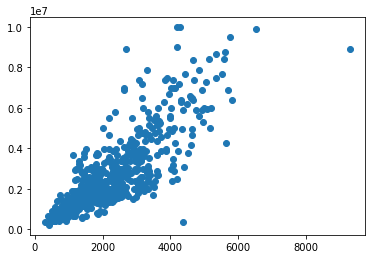

In [367]:
plt.scatter(X,y)

We observe a linear relationship between `X` and `y` and we could probably even predict a best fitting line using our eyes

In [368]:
regressor = LinearRegression(normalize=True)
model = regressor.fit(X.values[:,np.newaxis],y.values[:,np.newaxis])

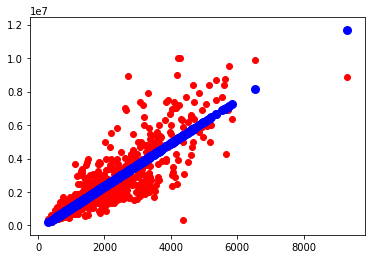

In [369]:
y_pred = model.predict(X.values[:,np.newaxis])
plt.scatter(X,y,color='red')
plt.scatter(X, y_pred, color='blue', linewidth=3)

In [370]:
new_sqft = 980
predicted_price = model.predict(np.array([[new_sqft]]))
print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

Predicted price is $1.038485037632666M


## Multivariate Linear Regression

In [371]:
X_multi = df[['sqft', 'bed', 'bath']]

In [372]:
regressor_multi = LinearRegression(normalize=True)
model_multi = regressor_multi.fit(X_multi.values,y.values[:,np.newaxis])

In [373]:
new_sqft = 980
new_bed = 2
new_bath = 2
predicted_price = model_multi.predict(np.array([[new_sqft, new_bed, new_bath]]))
print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

Predicted price is $1.1334203770774895M


## Our model is not working! Perhaps due to absense of normalization

In [374]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# X_scaled = scaler.transform(X)

In [375]:
# regressor_multi_scaled = LinearRegression(normalize=True)
# model_multi_scaled = regressor_multi_scaled.fit(X_scaled,y.values[:,np.newaxis])

In [376]:
# new_sqft = 3200
# new_bed = 3
# new_bath = 3
# X_new = np.array([[new_sqft, new_bed, new_bath]])
# predicted_price = model_multi_scaled.predict(scaler.transform(X_new))
# print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

## We can see that the multivariate may perform marginally better. But we need more context for the regressor to perform optimally!
Right now we are not using some of the important categorical features such as Area and SubArea

In [377]:
df.sub_area.unique()

array(['False Creek', 'Downtown West', 'Yaletown', 'South Vancouver',
       'Southlands', 'West End', 'Victoria East', 'Southwest Marine',
       'South Granville', 'University (UBC)', 'Dunbar', 'Coal Harbour',
       'Fairview', 'Collingwood', 'Champlain Heights', 'Downtown East',
       'Killarney', 'Fraser East', 'Hastings', 'Hastings East',
       'Kerrisdale', 'Fraserview East', 'Grandview East',
       'Mount Pleasant East', 'Knight', 'Renfrew Heights', 'South Cambie',
       'Quilchena', 'Oakridge', 'Marpole', 'MacKenzie Heights', 'Arbutus',
       'Cambie', 'Main', 'Kitsilano', 'Renfrew', 'Point Grey',
       'Mount Pleasant West', 'Shaughnessy'], dtype=object)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 720
Data columns (total 19 columns):
address                    695 non-null object
price                      695 non-null int64
link                       695 non-null object
bed                        695 non-null int64
bath                       695 non-null int64
sqft                       695 non-null int64
age                        695 non-null float64
gross_taxes_2017           623 non-null float64
strata_maintenance_fees    342 non-null float64
area                       695 non-null object
sub_area                   695 non-null object
property_type              695 non-null object
strata_type                695 non-null object
listing_id                 695 non-null object
primary_broker             695 non-null object
features                   695 non-null object
amenities                  695 non-null object
school_info                695 non-null object
latlng                     695 non-null object
dty

In [379]:
X_w_cat = pd.get_dummies(df[['bed', 'bath', 'sqft', 'sub_area','area']])
# X_w_cat = pd.get_dummies(df[['bed', 'bath', 'sqft', 'area', 'sub_area', 'property_type', 'strata_type']])


In [380]:
X_w_cat.columns

Index(['bed', 'bath', 'sqft', 'sub_area_Arbutus', 'sub_area_Cambie',
       'sub_area_Champlain Heights', 'sub_area_Coal Harbour',
       'sub_area_Collingwood', 'sub_area_Downtown East',
       'sub_area_Downtown West', 'sub_area_Dunbar', 'sub_area_Fairview',
       'sub_area_False Creek', 'sub_area_Fraser East',
       'sub_area_Fraserview East', 'sub_area_Grandview East',
       'sub_area_Hastings', 'sub_area_Hastings East', 'sub_area_Kerrisdale',
       'sub_area_Killarney', 'sub_area_Kitsilano', 'sub_area_Knight',
       'sub_area_MacKenzie Heights', 'sub_area_Main', 'sub_area_Marpole',
       'sub_area_Mount Pleasant East', 'sub_area_Mount Pleasant West',
       'sub_area_Oakridge', 'sub_area_Point Grey', 'sub_area_Quilchena',
       'sub_area_Renfrew', 'sub_area_Renfrew Heights', 'sub_area_Shaughnessy',
       'sub_area_South Cambie', 'sub_area_South Granville',
       'sub_area_South Vancouver', 'sub_area_Southlands',
       'sub_area_Southwest Marine', 'sub_area_University (UB

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.neural_network import MLPRegressor
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
    regressor = LinearRegression(normalize=True)
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, mean_squared_error(y_test, y_pred)
def train_test_xgb(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
    regressor = XGBRegressor()
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, mean_squared_error(y_test, y_pred)
def train_test_nn(X, y):
    from sklearn.preprocessing import StandardScaler
#     scaler = StandardScaler().fit(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
    regressor = MLPRegressor(max_iter=20000,
                             hidden_layer_sizes=(100,), 
                             activation='relu',
                             solver='lbfgs',)
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, mean_squared_error(y_test, y_pred)
model1a, mse1a = train_test(X.values[:,np.newaxis],y)
print("LinearRegressor:")
print(np.sqrt(mse1a))
model1b, mse1b = train_test(X_multi.values,y)
print(np.sqrt(mse1b))
model1c, mse1c = train_test(X_w_cat.values,y)
print(np.sqrt(mse1c))
print("XGBRegressor:")
model2a, mse2a = train_test_xgb(X.values[:,np.newaxis],y)
print(np.sqrt(mse2a))
model2b, mse2b = train_test_xgb(X_multi.values,y)
print(np.sqrt(mse2b))
model2c, mse2c = train_test_xgb(X_w_cat.values,y)
print(np.sqrt(mse2c))
print("MLPRegressor:")
model3a, mse3a = train_test_nn(X.values[:,np.newaxis],y)
print(np.sqrt(mse3a))
model3b, mse3b = train_test_nn(X_multi.values,y)
print(np.sqrt(mse3b))
model3c, mse3c = train_test_nn(X_w_cat.values,y)
print(np.sqrt(mse3c))

LinearRegressor:
936509.811871284
842337.7039418523
775684.5889074674
XGBRegressor:
1166981.2168222887
886287.0257023593
669372.2574982874
MLPRegressor:
933478.2219466884
844224.5423672849
724676.5381509614


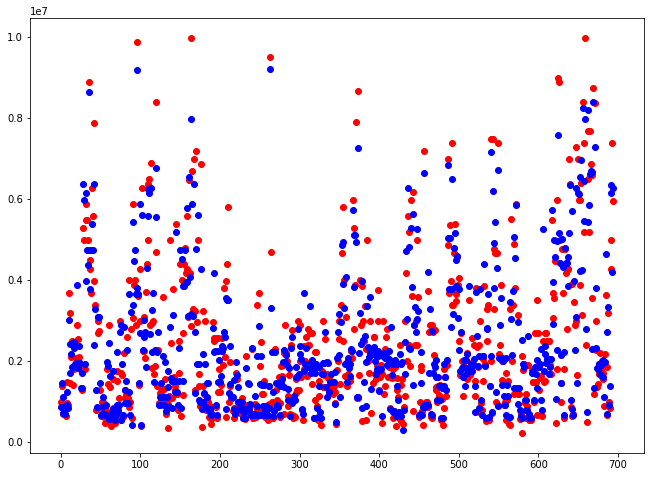

In [382]:
y_pred = model2c.predict(X_w_cat.values)
plt.figure(figsize=(11,8))
plt.scatter(range(len(X)),y,color='red', linewidth=1)
plt.scatter(range(len(X)), y_pred, color='blue', linewidth=1)

In [383]:
# try brand new data
gt = '$438,800'
sqft = 713
bed = 1
bath = 1
sub_area = "South Granville"
area = "Vancouver East"
# property_type = "Apt/Condo"
new_data = {'sqft': sqft,
            'bed': bed,
            'bath': bath,
            'sub_area_{}'.format(sub_area): 1,
            'area_{}'.format(area): 1
           }
new_df = pd.get_dummies(pd.DataFrame(data=[new_data], columns=X_w_cat.columns).fillna(0))
y_pred = model2c.predict(new_df.values)
print('Linear: ${}M'.format(model1a.predict(np.array([[sqft]]))[0]/1e6))
print('XGB: ${}M'.format(model2c.predict(new_df.values)[0]/1e6))
print('NN: ${}M'.format(model3c.predict(new_df.values)[0]/1e6))
print("gt={}".format(gt))

Linear: $0.6987925240524436M
XGB: $1.0140083125M
NN: $0.5197986330589667M
gt=$438,800


## XGBoost is very good at assigning feature importance! It knows which areas cost more etc.

In [384]:
for col, fi in zip(X_w_cat.columns,model2c.feature_importances_.tolist()):
    print('{}:{}'.format(col,fi))

bed:0.12558870017528534
bath:0.10361067205667496
sqft:0.3956044018268585
sub_area_Arbutus:0.0
sub_area_Cambie:0.0
sub_area_Champlain Heights:0.0094191525131464
sub_area_Coal Harbour:0.0188383050262928
sub_area_Collingwood:0.0
sub_area_Downtown East:0.0188383050262928
sub_area_Downtown West:0.0047095762565732
sub_area_Dunbar:0.0188383050262928
sub_area_Fairview:0.0031397175043821335
sub_area_False Creek:0.0
sub_area_Fraser East:0.0
sub_area_Fraserview East:0.0094191525131464
sub_area_Grandview East:0.015698587521910667
sub_area_Hastings:0.0
sub_area_Hastings East:0.007849293760955334
sub_area_Kerrisdale:0.0141287287697196
sub_area_Killarney:0.0188383050262928
sub_area_Kitsilano:0.0094191525131464
sub_area_Knight:0.0
sub_area_MacKenzie Heights:0.0141287287697196
sub_area_Main:0.0
sub_area_Marpole:0.012558870017528534
sub_area_Mount Pleasant East:0.0
sub_area_Mount Pleasant West:0.0
sub_area_Oakridge:0.015698587521910667
sub_area_Point Grey:0.025117740035057068
sub_area_Quilchena:0.015698

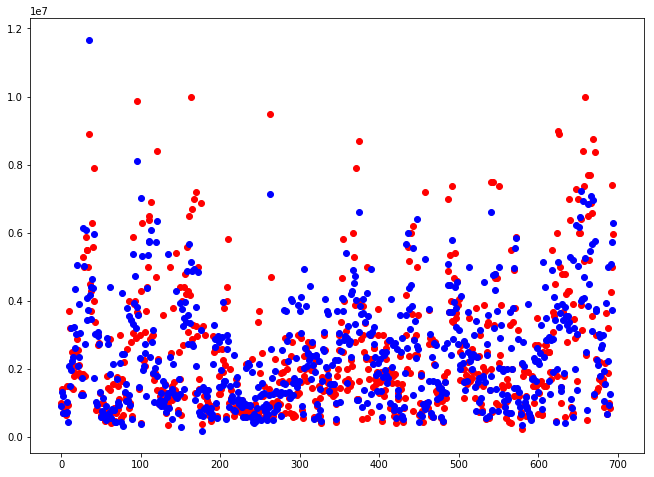

In [385]:
y_pred = model1a.predict(X.values[:,np.newaxis])
plt.figure(figsize=(11,8))
plt.scatter(range(len(X)),y,color='red', linewidth=1)
plt.scatter(range(len(X)), y_pred, color='blue', linewidth=1)

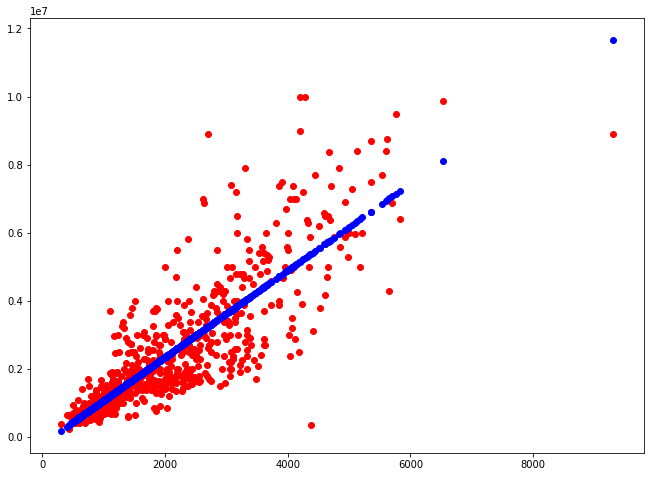

In [386]:
y_pred = model1a.predict(X.values[:,np.newaxis])
plt.figure(figsize=(11,8))
plt.scatter(X,y,color='red', linewidth=1)
plt.scatter(X, y_pred, color='blue', linewidth=1)

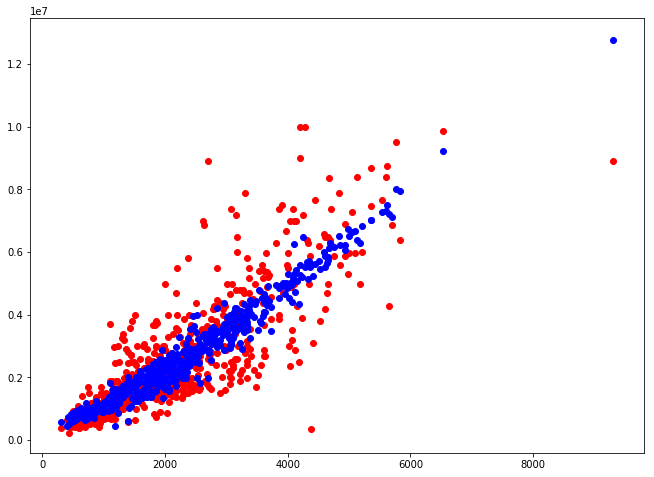

In [387]:
y_pred = model1b.predict(X_multi.values)
plt.figure(figsize=(11,8))
plt.scatter(X,y,color='red', linewidth=1)
plt.scatter(X, y_pred, color='blue', linewidth=1)

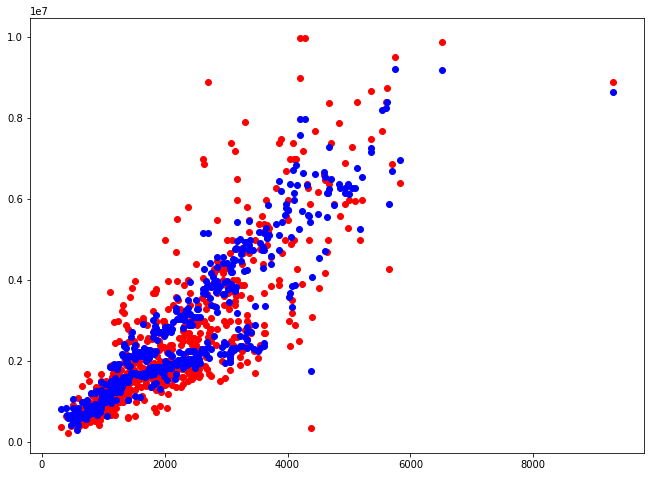

In [388]:
y_pred = model2c.predict(X_w_cat.values)
plt.figure(figsize=(11,8))
plt.scatter(X,y,color='red', linewidth=1)
plt.scatter(X, y_pred, color='blue', linewidth=1)

Notes: We noticed that more features and XGBoost worked much better once outliers were removed. Must be a good topic to discuss.  
We should engineer some features and see our results

ALSO: Let's transform the data such that it is closer to normal distribution

# TODO: 
* ~~Scrape more data with more variables~~
* select features
* engineer features (dist to schools?, dist to city center?)
* Train a basic linear regressor
* Train a better model
* Train a neural network